# 제품 이상여부 판별 프로젝트

## 1. 데이터 불러오기

### 필수 라이브러리

In [229]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [230]:
# 랜덤 스테이트 지정
RANDOM_STATE = 110

In [231]:
df_merged = pd.read_csv("data/df_merged.csv")

C:\Users\juneh\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (26,116,165) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [232]:
df_merged.tail(7)

,Wip Line - Dam,Process Desc. - Dam,Equipment - Dam,Model.Suffix - Dam,Workorder - Dam,Set ID,Collect Date - Dam,Insp. Seq No. - Dam,Insp Judge Code - Dam,Collect Result - Dam,...,Collect Result.31 - Fill2,Collect Result.32 - Fill2,Collect Result.33 - Fill2,Collect Result.34 - Fill2,Collect Result.35 - Fill2,Collect Result.36 - Fill2,Collect Result.37 - Fill2,Collect Result.38 - Fill2,Collect Result.39 - Fill2,target
40499,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334505,4F1XB738-1,OP753345054040002677,2024-04-28 18:22:11,1,OK,1000.0,...,50.0,91.8,270,50,114.612,19.2,15,427,1,Normal
40500,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002678,2024-04-28 18:23:13,1,OK,240.0,...,50.0,91.8,270,50,114.612,19.2,1,428,1,Normal
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002680,2024-04-28 18:25:20,1,OK,240.0,...,50.0,91.8,270,50,114.612,18.8,2,430,1,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334505,4F1XB738-1,OP753345054040002681,2024-04-28 18:26:27,1,OK,1000.0,...,50.0,91.8,270,50,114.612,19.0,9,431,1,Normal
40503,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002682,2024-04-28 18:27:27,1,OK,240.0,...,50.0,91.8,270,50,114.612,19.3,3,432,1,Normal
40504,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002684,2024-04-28 18:29:36,1,OK,240.0,...,50.0,91.8,270,50,114.612,19.6,4,434,1,Normal
40505,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002688,2024-04-28 18:33:51,1,OK,240.0,...,50.0,91.8,270,50,114.612,18.8,6,438,1,Normal


In [233]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 189 entries, Wip Line - Dam to target
dtypes: float64(72), int64(77), object(40)
memory usage: 58.4+ MB


In [234]:
# 각 변수의 null 비율을 계산합니다.
null_percentage = df_merged.isnull().sum() / df_merged.shape[0]

# null 비율이 0보다 큰 변수만 필터링합니다.
null_columns = null_percentage[null_percentage > 0]

# 결과 출력
print("null 값이 있는 변수의 null값 비율:")
print(null_columns)


null 값이 있는 변수의 null값 비율:
Collect Result.17 - Dam      0.315163
Collect Result.7 - Fill1     0.315163
Collect Result.17 - Fill2    0.315163
dtype: float64


In [235]:
df_merged['Collect Result.17 - Dam'].value_counts()

OK       11293
549       7271
162.4     3580
550.0     2398
550.3     1909
549.5     1263
548.5       26
Name: Collect Result.17 - Dam, dtype: int64

In [236]:
df_merged['Collect Result.7 - Fill1'].value_counts()

OK       11293
838.4     7658
837.9     4957
837.7     3577
838.2      253
837.5        2
Name: Collect Result.7 - Fill1, dtype: int64

In [237]:
df_merged['Collect Result.17 - Fill2'].value_counts()

835.5    12868
OK       11293
305.0     3579
Name: Collect Result.17 - Fill2, dtype: int64

In [238]:
df_merged.describe()

,Insp. Seq No. - Dam,Collect Result - Dam,Collect Result.1 - Dam,Collect Result.2 - Dam,Collect Result.3 - Dam,Collect Result.4 - Dam,Collect Result.5 - Dam,Collect Result.6 - Dam,Collect Result.7 - Dam,Collect Result.8 - Dam,...,Collect Result.30 - Fill2,Collect Result.31 - Fill2,Collect Result.32 - Fill2,Collect Result.33 - Fill2,Collect Result.34 - Fill2,Collect Result.35 - Fill2,Collect Result.36 - Fill2,Collect Result.37 - Fill2,Collect Result.38 - Fill2,Collect Result.39 - Fill2
count,40506.0,40506.000000,40506.000000,40506.000000,40506.000000,40506.0,40506.0,40506.0,40506.000000,40506.0,...,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000
mean,1.0,530.370809,6.320669,-21.227966,73.864119,1150.0,33.5,0.0,743.449859,33.5,...,90.983336,66.972414,164.156081,180.671505,64.211351,62.048909,14.385928,73.539648,108.691453,0.771392
std,0.0,369.283055,4.858988,87.461776,9.761997,0.0,0.0,0.0,364.424068,0.0,...,33.885760,20.527895,87.513657,108.041552,17.188429,36.466634,7.261448,105.176311,130.758018,1.289203
min,1.0,240.000000,2.500000,-90.000000,70.000000,1150.0,33.5,0.0,280.000000,33.5,...,50.000000,50.000000,91.800000,50.000000,50.000000,17.600000,1.000000,0.000000,0.000000,0.000000
25%,1.0,240.000000,2.500000,-90.000000,70.000000,1150.0,33.5,0.0,280.000000,33.5,...,50.000000,50.000000,91.800000,50.000000,50.000000,19.600000,7.000000,7.000000,1.000000,0.000000
50%,1.0,240.000000,2.500000,-90.000000,70.000000,1150.0,33.5,0.0,1030.000000,33.5,...,119.000000,50.000000,91.800000,270.000000,50.000000,85.000000,19.500000,13.000000,49.000000,1.000000
75%,1.0,1000.000000,12.500000,90.000000,70.000000,1150.0,33.5,0.0,1030.000000,33.5,...,119.000000,91.800000,270.000000,270.000000,85.000000,85.000000,19.900000,120.000000,196.000000,1.000000
max,1.0,1000.000000,12.500000,90.000000,105.000000,1150.0,33.5,0.0,1030.000000,33.5,...,119.000000,91.800000,270.000000,270.000000,85.000000,284.100000,52.900000,487.000000,608.000000,17.000000


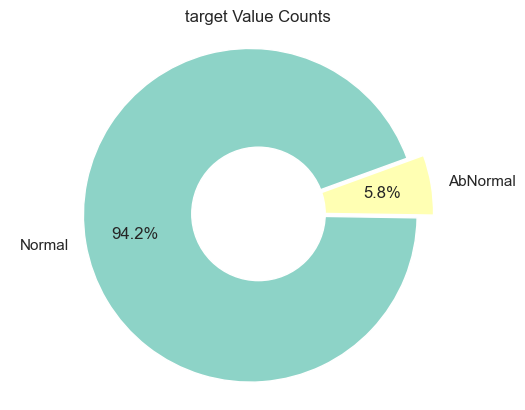

In [239]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Seaborn 스타일을 설정합니다.
sns.set(style="whitegrid")

# 'target' 컬럼의 값 비율을 계산합니다.
value_counts = df_merged['target'].value_counts(normalize=True)

# 도넛 차트를 그리기 위한 설정을 합니다.
fig, ax = plt.subplots()
ax.pie(value_counts, labels = value_counts.index, autopct='%1.1f%%', startangle=20, 
       colors=sns.color_palette("Set3"), pctdistance=0.7, explode = [0.05]*len(value_counts))

# 원형을 유지하도록 합니다.
plt.axis('equal')  

# 도넛 차트의 중앙에 하얀 원을 추가합니다.
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig.gca().add_artist(centre_circle)

# 차트 제목을 추가합니다.
plt.title('target Value Counts')

# 차트를 출력합니다.
plt.show()

In [240]:
df_merged['target']


0        AbNormal
1        AbNormal
2        AbNormal
3        AbNormal
4        AbNormal
           ...   
40501      Normal
40502      Normal
40503      Normal
40504      Normal
40505      Normal
Name: target, Length: 40506, dtype: object

---

In [241]:
for col in df_merged.columns:
    counts = df_merged[col].value_counts()
    print(f"Value counts for column {col}:")
    print(counts)
    print()

Value counts for column Wip Line - Dam:
IVI-OB6    40506
Name: Wip Line - Dam, dtype: int64

Value counts for column Process Desc. - Dam:
Dam Dispenser    40506
Name: Process Desc. - Dam, dtype: int64

Value counts for column Equipment - Dam:
Dam dispenser #1    25030
Dam dispenser #2    15476
Name: Equipment - Dam, dtype: int64

Value counts for column Model.Suffix - Dam:
AJX75334501    33820
AJX75334502     3390
AJX75334505     2635
AJX75334507      310
AJX75334503      162
AJX75334506      129
AJX75334508       60
Name: Model.Suffix - Dam, dtype: int64

Value counts for column Workorder - Dam:
3L1X8574-2       272
3K1XC268-1       227
3L1X9934-1       217
3L1X8506-1       217
3K1XA586-2       189
                ... 
3FPXX064-0003      2
4A1XE569-1         2
3HPM0061-1         1
3H1XB714-1         1
4CPM0166-1         1
Name: Workorder - Dam, Length: 663, dtype: int64

Value counts for column Set ID:
OP753345013050000003    1
OP753345023120000104    1
OP753345023120000096    1
OP753

In [242]:
# 각 변수의 null 비율을 계산합니다.
null_percentage = df_merged.isnull().sum() / df_merged.shape[0]

# null 비율이 0보다 큰 변수만 필터링합니다.
null_columns = null_percentage[null_percentage > 0]

# 결과 출력
print("null 값이 있는 변수의 null값 비율:")
print(null_columns)


null 값이 있는 변수의 null값 비율:
Collect Result.17 - Dam      0.315163
Collect Result.7 - Fill1     0.315163
Collect Result.17 - Fill2    0.315163
dtype: float64


In [243]:
df_merged[df_merged['Collect Result.17 - Dam']=='OK'].value_counts()

Wip Line - Dam  Process Desc. - Dam  Equipment - Dam   Model.Suffix - Dam  Workorder - Dam  Set ID                Collect Date - Dam   Insp. Seq No. - Dam  Insp Judge Code - Dam  Collect Result - Dam  Collect Result.1 - Dam  Collect Result.2 - Dam  Collect Result.3 - Dam  Collect Result.4 - Dam  Collect Result.5 - Dam  Collect Result.6 - Dam  Collect Result.7 - Dam  Collect Result.8 - Dam  Collect Result.9 - Dam  Collect Result.10 - Dam  Collect Result.11 - Dam  Collect Result.12 - Dam  Collect Result.13 - Dam  Collect Result.14 - Dam  Collect Result.15 - Dam  Collect Result.16 - Dam  Collect Result.17 - Dam  Collect Result.18 - Dam  Collect Result.19 - Dam  Collect Result.20 - Dam  Collect Result.21 - Dam  Collect Result.22 - Dam  Collect Result.23 - Dam  Collect Result.24 - Dam  Collect Result.25 - Dam  Collect Result.26 - Dam  Collect Result.27 - Dam  Collect Result.28 - Dam  Collect Result.29 - Dam  Collect Result.30 - Dam  Collect Result.31 - Dam  Collect Result.32 - Dam  Collect 

In [244]:
dam_ok = df_merged[df_merged['Collect Result.17 - Dam'] == 'OK']
dam_ok['target'].value_counts(normalize=True)

Normal      0.956079
AbNormal    0.043921
Name: target, dtype: float64

In [245]:
fill1_ok = df_merged[df_merged['Collect Result.7 - Fill1'] == 'OK']
fill1_ok['target'].value_counts(normalize=True)

Normal      0.956079
AbNormal    0.043921
Name: target, dtype: float64

In [246]:
fill2_ok = df_merged[df_merged['Collect Result.17 - Fill2'] == 'OK']
fill2_ok['target'].value_counts(normalize=True)

Normal      0.956079
AbNormal    0.043921
Name: target, dtype: float64

In [247]:
df_merged['Collect Result.17 - Dam'].value_counts()

OK       11293
549       7271
162.4     3580
550.0     2398
550.3     1909
549.5     1263
548.5       26
Name: Collect Result.17 - Dam, dtype: int64

In [248]:
# 결측값 'unknown' 값으로 대체
df_merged['Collect Result.17 - Dam'].fillna('unknown', inplace=True)
df_merged['Collect Result.7 - Fill1'].fillna('unknown', inplace=True)
df_merged['Collect Result.17 - Fill2'].fillna('unknown', inplace=True)

In [249]:
print(df_merged['Collect Result.17 - Dam'].isnull().sum())
print(df_merged['Collect Result.7 - Fill1'].isnull().sum())
print(df_merged['Collect Result.17 - Fill2'].isnull().sum())

0
0
0


In [250]:
dam_ok = df_merged[df_merged['Collect Result.17 - Dam'] == 'unknown']
dam_ok['target'].value_counts(normalize=True)

Normal      0.94924
AbNormal    0.05076
Name: target, dtype: float64

In [251]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 189 entries, Wip Line - Dam to target
dtypes: float64(72), int64(77), object(40)
memory usage: 58.4+ MB


## 3. 모델 학습

In [252]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)

def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])
    weighted_F1 = f1_score(y_test, y_pred, average='weighted')

    metrics = pd.DataFrame({
        '정확도': [accuracy],
        '정밀도': [precision],
        '재현율': [recall],
        'F1 Score': [F1],
        'Weighted F1': [weighted_F1]
    })

    confusion_df = pd.DataFrame(confusion, index=['True', 'False'], columns=['True', 'False'])

    print("\n오차행렬:")
    display(confusion_df)
    print("평가 지표:")
    display(metrics)

In [253]:
# !pip install lightgbm

In [254]:
# 모델 라이브러리
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# 보팅
from sklearn.ensemble import VotingClassifier

In [255]:
# RandomForest
rf_model = RandomForestClassifier(
    n_estimators=1935
    , max_depth=32
    , min_samples_split=2
    , min_samples_leaf=1   
    , bootstrap=True
    , criterion='entropy'
    , class_weight='balanced'
    , random_state=0
)

# LightGBM_dart
lgbm_dart_model = LGBMClassifier(
    n_estimators=1029
    , num_leaves=167
    , max_depth=30
    , learning_rate=0.05767571715999541
    , min_child_samples=25
    , verbose=-1
    , boosting='dart'  # dart 사용
    , random_state=0
)

# XGBoost 
xgb_model = XGBClassifier(
    n_estimators=414
    , learning_rate=0.20046808426888615
    , max_depth=11
    , alpha=0.004365542651458743
    , gamma=0.00025712949731685885
    , reg_alpha=0.17168922089033928
    , reg_lambda=0.03881395024846057
    , colsample_bytree=0.32031741412326675
    , subsample=0.6269215430592496
    , objective='binary:logistic'  # 이진 분류
    , tree_method="exact"        
    , random_state=0
)

# ExtraTrees
et_model = ExtraTreesClassifier(
    n_estimators=100
    , max_depth=48
    , min_samples_split=3
	, min_samples_leaf=1
	, criterion='gini'
	, random_state=0
)

In [256]:
### 보팅 분류기 생성 ###
model = VotingClassifier(
    estimators=[
        ('lgb_dart',lgbm_dart_model),
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('et', et_model)
    ],
    voting='soft'  # 'hard'는 다수결 투표, 'soft'는 확률 평균
)

In [257]:
df_merged = df_merged.sort_values(by=["Collect Date - Dam"])
df_train, df_val = train_test_split(
    df_merged,
    test_size=0.3,
    stratify=df_merged["target"],
    random_state=RANDOM_STATE,
)


def print_stats(df: pd.DataFrame):
    num_normal = len(df[df["target"] == "Normal"])
    num_abnormal = len(df[df["target"] == "AbNormal"])

    print(
        f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}"
        + f" ratio: {num_abnormal/num_normal}"
    )


# Print statistics
print(f"  \tAbnormal\tNormal")
print_stats(df_train)
print_stats(df_val)

  	Abnormal	Normal
  Total: Normal: 26709, AbNormal: 1645 ratio: 0.06158972630948369
  Total: Normal: 11447, AbNormal: 705 ratio: 0.06158818904516467


In [258]:
features = []

for col in df_train.columns:
    try:
        df_train[col] = df_train[col].astype(int)
        features.append(col)
    except:
        continue

if "Set ID" in features:
    features.remove("Set ID")

train_x = df_train[features]
train_y = df_train["target"]

model.fit(train_x, train_y)

VotingClassifier(estimators=[('lgb_dart',
                              LGBMClassifier(boosting='dart',
                                             learning_rate=0.05767571715999541,
                                             max_depth=30, min_child_samples=25,
                                             n_estimators=1029, num_leaves=167,
                                             random_state=0, verbose=-1)),
                             ('xgb',
                              XGBClassifier(alpha=0.004365542651458743,
                                            base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_by...
                                            monotone_constraints=None,
                                            n_estimators=414, n_jobs=N

## 4. 제출하기

### 테스트 데이터 예측

테스트 데이터 불러오기

In [282]:
df_test_y = pd.read_csv(os.path.join("submission.csv"))

In [283]:
df_test = pd.merge(X, df_test_y, "inner", on="Set ID")
df_test_x = df_test[features]

for col in df_test_x.columns:
    try:
        df_test_x.loc[:, col] = df_test_x[col].astype(int)
    except:
        continue

In [281]:
df_test_x

,Insp. Seq No. - Dam,Collect Result - Dam,Collect Result.1 - Dam,Collect Result.2 - Dam,Collect Result.3 - Dam,Collect Result.4 - Dam,Collect Result.5 - Dam,Collect Result.6 - Dam,Collect Result.7 - Dam,Collect Result.8 - Dam,...,Collect Result.30 - Fill2,Collect Result.31 - Fill2,Collect Result.32 - Fill2,Collect Result.33 - Fill2,Collect Result.34 - Fill2,Collect Result.35 - Fill2,Collect Result.36 - Fill2,Collect Result.37 - Fill2,Collect Result.38 - Fill2,Collect Result.39 - Fill2


In [284]:
df_test

,Wip Line - Dam,Process Desc. - Dam,Equipment - Dam,Model.Suffix - Dam,Workorder - Dam,Set ID,Collect Date - Dam,Insp. Seq No. - Dam,Insp Judge Code - Dam,Collect Result - Dam,...,Collect Result.31 - Fill2,Collect Result.32 - Fill2,Collect Result.33 - Fill2,Collect Result.34 - Fill2,Collect Result.35 - Fill2,Collect Result.36 - Fill2,Collect Result.37 - Fill2,Collect Result.38 - Fill2,Collect Result.39 - Fill2,target


In [270]:
test_pred = model.predict(df_test_x)
test_pred

array(['Normal', 'Normal', 'Normal', ..., 'Normal', 'Normal', 'Normal'],
      dtype=object)

### 제출 파일 작성

In [275]:
print(f"Length of df_sub: {len(df_sub)}")
print(f"Length of test_pred: {len(test_pred)}")


Length of df_sub: 17361
Length of test_pred: 12152


In [273]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")

test_pred = model.predict(df_sub)
test_pred

df_sub["target"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

ValueError: Length of values (12152) does not match length of index (17361)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**